# CS770 Machine Learning Project

# Fligh-Fare Prediction Using Machine Learning

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset
- The dataset, containing flight fare data, is loaded from an Excel file into a Pandas DataFrame for subsequent analysis.


In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

## Data Exploration

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## Checking Data Types
- The `.info()` method is used to check the data types of each column and identify columns with missing values.
- The `.isnull().sum()` function quantifies missing values in each column.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Handling Missing Values
- Rows with missing values are identified, particularly focusing on key columns such as 'Total_Stops'.
- The project removes rows with missing data to maintain data quality and integrity.


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [8]:

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Type Conversion
- Columns like 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' are converted to datetime format. This conversion facilitates the extraction of time-based features and ensures consistent data handling.


In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


## Making a copy of the data to not loose entire data

In [13]:
data = train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [22]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [18]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [24]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

## Data Cleaning and Preparation
- Original columns, such as 'Dep_Time' and 'Arrival_Time', are dropped after the relevant information is extracted, simplifying the dataset.


In [25]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [79]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


### Data Type Conversion
- **Date and Time Conversion**: Columns such as `Date_of_Journey`, `Dep_Time`, and `Arrival_Time` are converted to `datetime` format to facilitate time-based analysis and feature extraction.


In [27]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [28]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

- Depature Time when the flight leaves the gate

In [29]:
extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-07-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-26 05:50:00,2024-07-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [30]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-07-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-26 05:50:00,2024-07-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


### Dropping Redundant Columns
- **Column Removal**: After extracting necessary features, original columns like `Dep_Time` and `Arrival_Time` are dropped to streamline the dataset.


In [31]:
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [32]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


### Final Dataset Structure
- **Shape and Overview**: The resulting dataset is compact with relevant features for subsequent analysis and modeling. It includes flight details like `Airline`, `Source`, `Destination`, and extracted time features, providing a refined dataset for predictive modeling and analysis.

In [33]:
data.shape

(10682, 16)

# Exploratory Data Analysis (EDA)

## 1. Extracting Flight Departure Time Categories
- A function `flight_dep_time(x)` is defined to categorize flight departure times into different periods of the day based on the hour:
  - "Early Morning" for departures between 4 AM and 8 AM
  - "Morning" for departures between 8 AM and 12 PM
  - "Noon" for departures between 12 PM and 4 PM
  - "Evening" for departures between 4 PM and 8 PM
  - "Night" for departures between 8 PM and 12 AM
  - "Late Night" for departures between 12 AM and 4 AM
- The function helps in converting numerical time data into more interpretable categorical data.

## 2. Applying the Function to the Dataset
- The `flight_dep_time` function is applied to the 'Dep_Time_hour' column of the dataset using the `.apply()` method.
- This operation categorizes each flight's departure time, facilitating analysis of patterns and trends.

## 3. Visualizing Departure Time Distribution
- A bar plot is created to visualize the frequency of flights departing during different times of the day.
- The plot shows that the highest number of flights depart in the "Early Morning," followed by "Evening" and "Morning" periods.
- The bar plot is generated using Pandas' `.plot()` method with the `kind` set to "bar" and the color specified as red ("r"), providing a clear visual representation of the data distribution.


In [34]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [35]:
def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    
    '''
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

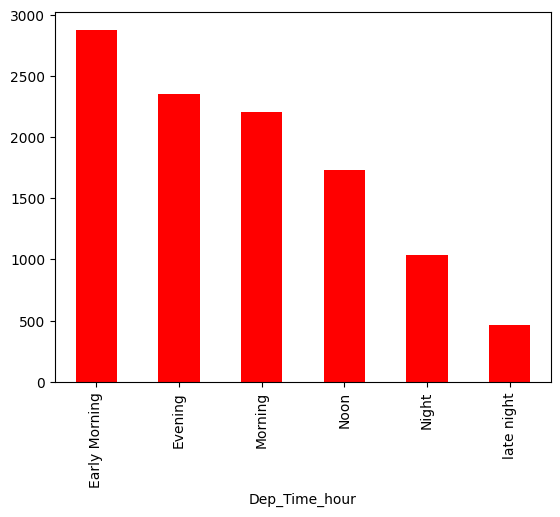

In [37]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="r")

In [38]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [1]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

NameError: name 'data' is not defined

## Flight Duration Data Preprocessing

## Duration Data Standardization
- A function `preprocess_duration(x)` is created to standardize the format of the 'Duration' column. This function ensures that all entries include both hours ('h') and minutes ('m') by appending '0h' or '0m' where necessary.


In [40]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [41]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [42]:
data['Duration'][0]

'2h 50m'

- The ' data['Duration'][0] ' is a string, which need to be converted for ML model

## Converting String to Integer
- The extracted string values of hours and minutes are converted into integers for numerical analysis. This conversion is necessary for computational purposes, such as calculating the total duration in minutes.


In [46]:
type('2h 50m'.split(' ')[0][0:-1])

str

- Converting into Integers

In [47]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [48]:
int('2h 50m'.split(' ')[1][0:-1])

50

## Extracting Hours and Minutes
- The 'Duration' column is processed to split into hours and minutes using string manipulation. This step involves separating the numerical values of hours and minutes, which are initially in string format.


In [49]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [50]:
pd.to_timedelta(data["Duration"]).dt.components.hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: hours, Length: 10682, dtype: int64

In [53]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [55]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [56]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

## Scatter Plot of Duration vs. Price
- A scatter plot is created using Seaborn to visualize the relationship between 'Duration_total_mins' and flight 'Price'. The plot shows the distribution of flight prices across different total durations, highlighting any patterns or trends.


- The scatter plot is further enhanced by adding color coding based on the 'Total_Stops' variable. This visualization provides insights into how the number of stops influences flight duration and price, using different colors to represent varying numbers of stops.

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

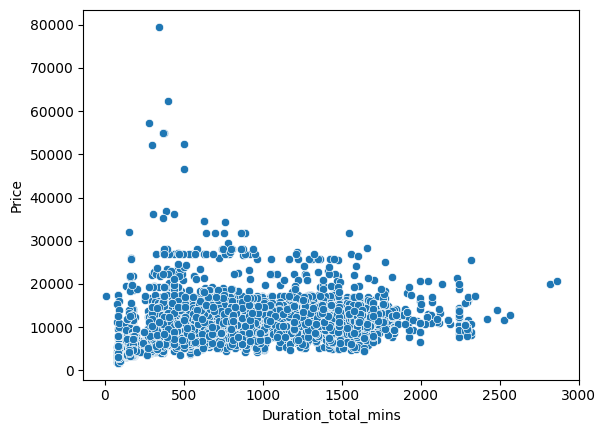

In [57]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

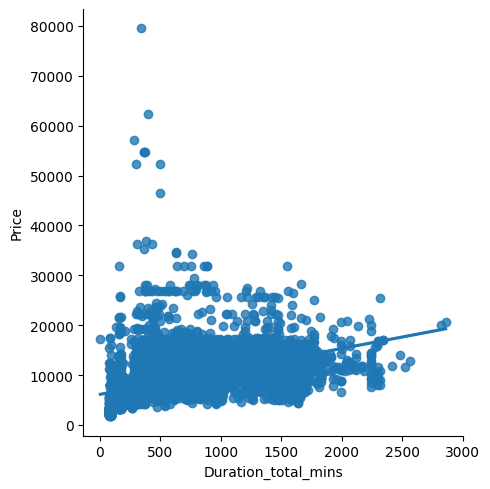

In [58]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

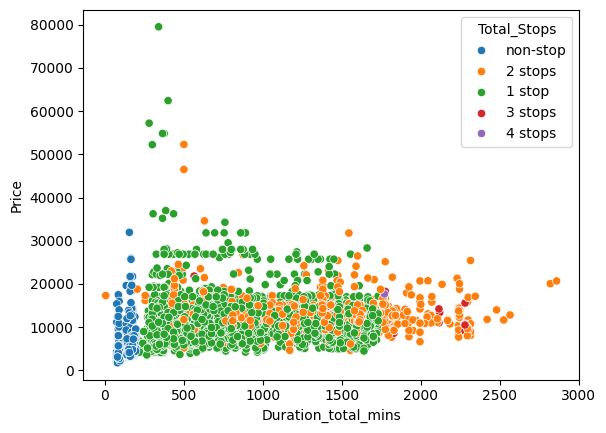

In [59]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

## Routes on which Jet Airways was frequesntly used

In [60]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [61]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Airline vs Price Analysis

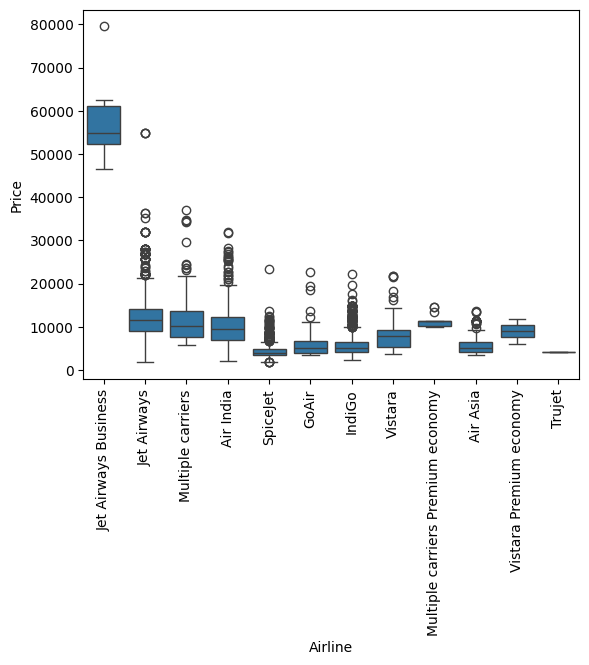

In [62]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

## Data Preprocessing and One Hot Encoding

### Data Inspection
- Initial inspection of the dataset reveals various columns including `Airline`, `Date_of_Journey`, `Source`, `Destination`, `Price`, and others. The data comprises both categorical and numerical features.

### Categorical and Numerical Columns
- **Categorical Columns**: Identified using the data type 'object'. These include columns like `Airline`, `Source`, `Destination`, `Route`, `Duration`, `Total_Stops`, and `Additional_Info`.
- **Numerical Columns**: All other columns that are not categorical.

### Feature Engineering: `Source` Column
- **Unique Values**: The `Source` column contains unique locations such as 'Banglore', 'Kolkata', 'Delhi', 'Chennai', and 'Mumbai'.
- **Binary Encoding**: Initially, binary encoding was applied to create a binary indicator for 'Banglore'. 
- **One-Hot Encoding**: Extended to one-hot encode all unique `Source` values, creating new columns like `Source_Banglore`, `Source_Kolkata`, etc., with binary values indicating the presence of each source location.

### Airline Feature Transformation
- **Mapping Airlines**: The `Airline` column's unique values are mapped to numerical indices based on the average `Price` associated with each airline.
- **Data Transformation**: The `Airline` column is transformed using this mapping, converting categorical labels into numerical indices.

### Destination Feature Transformation
- **Data Cleaning**: The `Destination` column initially had 'New Delhi' and 'Delhi' as separate entries, which were consolidated to 'Delhi'.
- **Mapping Destinations**: Similar to airlines, `Destination` values are mapped to numerical indices based on average `Price`, and the column is transformed accordingly.

### Handling `Total_Stops`
- **Unique Values**: The column includes categories like 'non-stop', '1 stop', '2 stops', etc.
- **Mapping Stops**: A mapping dictionary converts these categories to numerical values, reflecting the number of stops.


In [63]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2019,22,20,1,10,2,50,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,2019,5,50,13,15,7,25,7,25,445


In [66]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]
num_col = [col for col in data.columns if data[col].dtype!="object"]
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [67]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [68]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [70]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [72]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


In [73]:
data['Airline'].nunique()

12

In [74]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [77]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [80]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [81]:
data['Airline'] = data['Airline'].map(dict_airlines)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [82]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


In [83]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [85]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [86]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [87]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [88]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [89]:
data['Destination'] = data['Destination'].map(dict_dest)
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [90]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


In [91]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [92]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stop)
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

## Removing Unnecessary Features

In [93]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0


- Additional Info column contains almost 80% no information, so this column can be dropped

In [94]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [99]:
data.head(2)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,...,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,...,10,2,50,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,...,15,7,25,7,25,0,1,0,0,0


In [101]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

In [102]:
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0


In [103]:
data.drop(columns=['Duration'] , axis=1 , inplace=True)

## Outlier Treatment in Flight Price Data

### Visualizing Data Distribution

#### Plotting Function for 'Price' Column
- A custom plotting function is used to analyze the distribution of the `Price` column in the dataset.
- The function generates three plots:
  1. **Distribution Plot with KDE**: Illustrates the overall distribution and density of flight prices.
  2. **Box Plot**: Highlights the central tendency, spread, and potential outliers in the data.
  3. **Histogram**: Provides a count of occurrences of different price ranges, without smoothing from KDE.

### Outlier Detection Using Interquartile Range (IQR)

#### Calculation of IQR and Thresholds
- The Interquartile Range (IQR) method is employed to detect outliers in the `Price` column:
  - **Quartile 1 (Q1)** and **Quartile 3 (Q3)** represent the 25th and 75th percentiles, respectively.
  - **IQR** is the range between Q3 and Q1.
  - **Outlier Thresholds** are calculated as:
    - **Maximum Threshold**: Q3 + 1.5 * IQR
    - **Minimum Threshold**: Q1 - 1.5 * IQR

#### Identification of Outliers
- Prices falling outside the calculated maximum and minimum thresholds are considered outliers.
- The analysis identifies a significant number of outlier values that either exceed the maximum threshold or fall below the minimum.

### Outlier Treatment

#### Capping Extreme Values
- To address the issue of extreme outliers, particularly those with values exceeding 35,000, a capping method is applied:
  - **Median Replacement**: Prices above 35,000 are replaced with the median price of the dataset. This approach mitigates the impact of extreme outliers on the overall data distribution, ensuring a more robust analysis.

### Findings
- The initial analysis revealed a substantial number of outliers, which could potentially skew statistical analyses and predictive models.
- Post-treatment, the distribution of the `Price` data becomes more stabilized, improving the reliability of subsequent analyses.


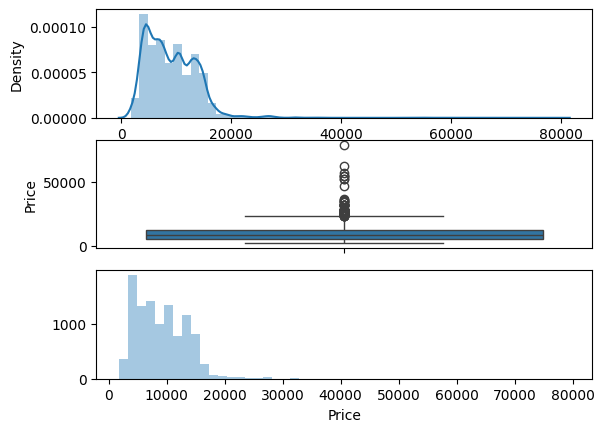

In [105]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)
plot(data , 'Price')

In [106]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [107]:
print(maximum)

23017.0


In [108]:
print(minimum)

-5367.0


In [109]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [110]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

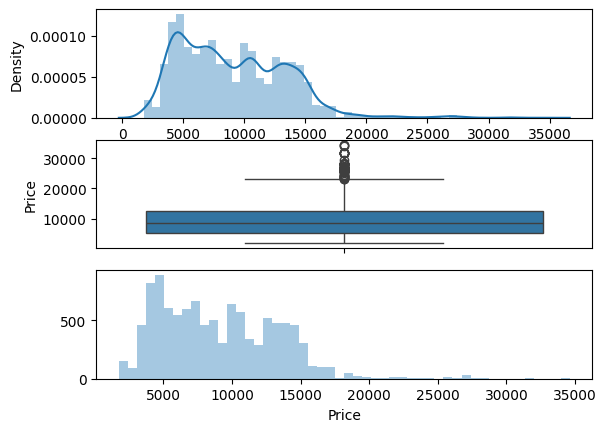

In [111]:
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])
plot(data , 'Price')

## Feature Selection and Model Training with Random Forest Regressor

### Data Preparation
- **Feature and Target Separation**:
  - The dataset `data` is divided into features (`X`) and the target variable (`y`), where `Price` is the target.

### Feature Importance Analysis
- **Mutual Information Regression**:
  - The mutual information regression technique is used to estimate the importance of each feature in predicting the target variable `Price`.
  
- **Importance Scores**:
  - A DataFrame (`imp_df`) is created to store the importance scores for each feature. Higher scores indicate greater importance in predicting the target.

- **Ranking of Features**:
  - Features are sorted by their importance scores in descending order. Key features include:
    - **Airline**: 1.321144
    - **Arrival_Time_hour**: 1.139048
    - **Duration_hours**: 1.122040

### Model Building
- **Data Splitting**:
  - The dataset is split into training and testing sets using an 80/20 split, facilitated by `train_test_split` with a random state of 42 to ensure reproducibility.

- **Random Forest Regressor**:
  - A `RandomForestRegressor` model is instantiated and trained on the training data (`X_train`, `y_train`).

### Model Prediction
- **Predictions**:
  - The model predicts `y_pred` for the test set (`X_test`).

- **Performance Evaluation**:
  - The `r2_score` metric from `sklearn.metrics` is used to assess the model's performance, yielding an R² score of approximately 0.808.


In [112]:
X = data.drop(['Price'] , axis=1)
y = data['Price']

In [113]:
from sklearn.feature_selection import mutual_info_regression

imp = mutual_info_regression(X , y)
imp_df = pd.DataFrame(imp , index=X.columns)
imp_df.columns = ['importance']
imp_df

,importance
Airline,1.321144
Destination,1.063471
Total_Stops,0.794346
Journey_day,0.378041
Journey_month,0.621626
Dep_Time_hour,0.922940
Dep_Time_minute,0.748677
Arrival_Time_hour,1.139048
Arrival_Time_minute,0.902473
Duration_hours,1.122040


In [114]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Airline,1.321144
Arrival_Time_hour,1.139048
Duration_hours,1.122040
Destination,1.063471
Duration_hour,0.960652
Dep_Time_hour,0.922940
Arrival_Time_minute,0.902473
Total_Stops,0.794346
Dep_Time_minute,0.748677
Duration_mins,0.683259


## Building Machine Learning Model

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestRegressor

ml_model = RandomForestRegressor()
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [117]:
y_pred = ml_model.predict(X_test)
y_pred

array([16816.83,  5406.62,  8890.42, ...,  3510.2 ,  6386.26,  6820.4 ])

In [118]:
from sklearn import metrics

metrics.r2_score(y_test , y_pred)

0.8075574547427983

## Model Evaluation and Performance Metrics

### Mean Absolute Percentage Error (MAPE)
- **Function Definition**: `mape` function calculates the Mean Absolute Percentage Error, which measures the accuracy of predictions as a percentage.
- **Implementation**: Converts actual (`y_true`) and predicted (`y_pred`) values to NumPy arrays, computes the absolute percentage error, and returns the mean multiplied by 100.
- **Result**: MAPE value is `13.25%`, indicating the average percentage difference between actual and predicted values.

### Predict Function for Model Evaluation
- **Function Definition**: `predict` function evaluates a machine learning model using several metrics.
- **Process**:
  1. **Model Training**: The model is fitted on the training data (`X_train`, `y_train`).
  2. **Training Score**: Prints the training score, indicating the model's performance on the training data.
  3. **Predictions**: Generates predictions for the test data (`X_test`).
  4. **Evaluation Metrics**: Calculates and prints various evaluation metrics:
     - **R² Score (`r2_score`)**: Measures the proportion of variance explained by the model. Higher values indicate better performance.
     - **Mean Absolute Error (MAE)**: The average absolute difference between predicted and actual values.
     - **Mean Squared Error (MSE)**: The average squared difference between predicted and actual values.
     - **Root Mean Squared Error (RMSE)**: The square root of MSE, providing error in the same units as the output.
     - **MAPE**: As calculated earlier, indicating percentage error.
  5. **Residual Distribution**: Plots the distribution of residuals (difference between actual and predicted values) using Seaborn's `distplot`.



In [125]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape(y_test , y_pred)

13.25036782488948

In [126]:
from sklearn import metrics

In [127]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9514995181739971
predictions are : [16892.71  5429.6   8811.33 ...  3617.78  6389.12  6911.24]


r2 score : 0.8099674485786736
MAE : 1184.2675645695874
MSE : 3699477.6344706495
RMSE : 1923.402618920607
MAPE : 13.287765991238382


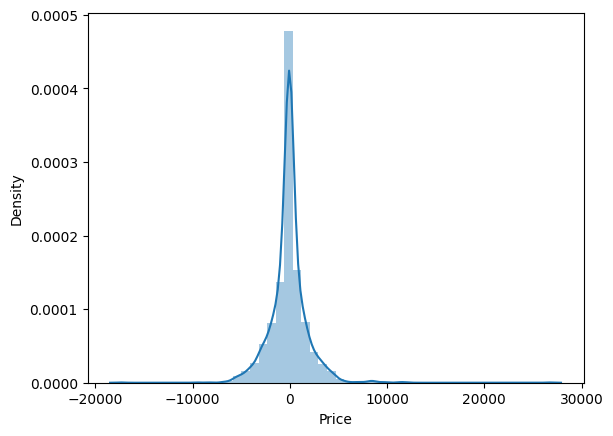

In [128]:
predict(RandomForestRegressor())

In [129]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8085. ...  3419.  5797.  6442.]


r2 score : 0.6788147343227895
MAE : 1414.8778859353552
MSE : 6252706.170638754
RMSE : 2500.5411755535547
MAPE : 15.584535913092424


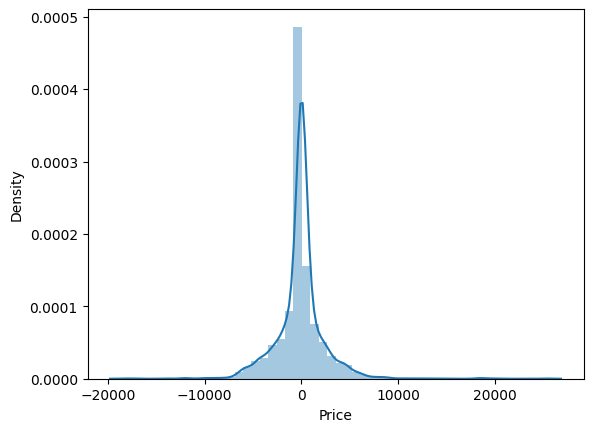

In [130]:
predict(DecisionTreeRegressor())

### Outputs
#### Random Forest Regressor
- **Training Score**: `0.9515`
- **R² Score**: `0.8099`
- **MAE**: `1184.27`
- **MSE**: `3699477.63`
- **RMSE**: `1923.40`
- **MAPE**: `13.29%`

#### Decision Tree Regressor
- **Training Score**: `0.9666`
- **R² Score**: `0.6788`
- **MAE**: `1414.88`
- **MSE**: `6252706.17`
- **RMSE**: `2500.54`
- **MAPE**: `15.58%`

## Hyperparameter Tuning of Random Forest Regressor using RandomizedSearchCV

### Hyperparameters Defined
1. **Number of Trees (`n_estimators`)**:
   - Ranges from 100 to 1200, defining the number of trees in the forest.
   
2. **Number of Features Considered (`max_features`)**:
   - Options include "auto" and "sqrt", which control the number of features to consider for the best split.
   
3. **Maximum Depth of Trees (`max_depth`)**:
   - Ranges from 5 to 30, indicating the maximum depth of the trees.

4. **Minimum Samples to Split a Node (`min_samples_split`)**:
   - Specifies the minimum number of samples required to split an internal node, with values [5, 10, 15, 100].

### Parameter Grid
- A dictionary (`random_grid`) encapsulates these hyperparameters, facilitating a structured approach to sampling combinations.

### Randomized Search
- `RandomizedSearchCV` performs cross-validated searches over the parameter grid:
  - **Cross-validation (cv)**: 3-fold, ensuring robust validation.
  - **n_jobs**: -1, utilizing all available processors for computation.
  - **verbose**: 2, providing detailed logs of the fitting process.



In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [133]:
reg_rf = RandomForestRegressor()
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [134]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [136]:

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [137]:

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [138]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [139]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [140]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='sqrt', min_samples_split=5,
                      n_estimators=320)

In [143]:
rf_random.best_score_

0.7955576839998164

### Results
- The optimal hyperparameters are identified:
  - `n_estimators`: 320
  - `max_features`: 'sqrt'
  - `max_depth`: 21
  - `min_samples_split`: 5

- **Best Estimator**: A `RandomForestRegressor` configured with the best hyperparameters.
- **Best Score**: Approximately 0.796, representing the model's performance metric, likely the mean cross-validated score.

# END